# Impact of Covid-19 on Economic Indicators in the Euro Zone

Authors: Anoushka Jain, Tajaldeep Singh Ahluwalia

## Abstract:

The objective of this report is to assess the impact of the Covid-19 pandemic on economic indicators in the countries of Germany, Greece, Spain, Italy and the Euro Zone. 
The indicators we will be selecting are: Inflation (CPI), Unemployment, GDP per capita, Foreign Direct Investment (FDI).
We will be using the Covid-19 dataset provided by the World Health Organisation and Our World in Data. The variables we shall be focusing on in that will be New cases, New deaths, Human Development Index, Median Age.....
We also aim to predict the economic indicators using Time series forecasting for the following year to see the possible impact of the pandemic.
As part of our analysis we would also explore the trends in the data.

## Introduction:

Inflation:
“Inflation is when you pay fifteen dollars for ten dollar haircut you used to get for five dollars when you had hair .” – Sam Ewing.

Inflation is the phenomenon of an increase in general price levels of goods and services. Consequently, the purchasing power of currency keeps falling. The reasons for inflation vary, ranging from excess money supply to national debt to exchange rates.

There are various types of inflation depending upon the speed it takes. Mild inflation is beneficial for the economy, which leads to an increase in demand and consumption as consumers buy now to beat future prices. An extreme form of inflation is stag inflation, wherein slow economic growth is coupled with  relatively high unemployment and rising inflation. At the other end of the spectrum lies hyperinflation, which is inflation increasing manifold times in a very short span of time. It erodes the real value of currency and causes people to minimize their holdings in that currency and switch to a more stable foreign currency. 

Unemployment:
The term unemployment refers to a situation when a person who is actively searching for employment is unable to find work. Unemployment is considered to be a key measure of the health of the economy. The most frequent measure of unemployment is the unemployment rate, which is the number of unemployed people divided by the number of people in the labor force.

GDP Per Capita:
Gross Domestic Product (GDP) Per capita is measures the economic output of a country per person and is a global measure to gauge the country's prosperity. It is calculated by dividing the GDP of a country by its population. GDP itself is the primary measure of a country's economic productivity. A country's GDP shows the market value of goods and services it produces.

Foreign Direct Investment (FDI):
Foreign direct investments (FDI) are substantial investments made by a company into a foreign concern. Generally, the term is used to describe a business decision to acquire a substantial stake in a foreign business or to buy it outright in order to expand its operations to a new region. It is not usually used to describe a stock investment in a foreign company. The investment may involve acquiring a source of materials, expanding a company's footprint, or developing a multinational presence. Thus it is a very important measure for economic prosperity in a country.

The reason we chose the countries Germany, Greece, Spain, Italy is that they were some of the worst hit countries in the Eurpoean Union during the pandemic. We would also like to do a comparison to the Euro Zone and see if there impact was above or below the average. Through our analysis we would like to see the economic situation in regards to these indicators of these countries.

## Literature Review

In [2]:
## Will add later

## Data Acquisition

##Loading the packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import missingno, os
from scipy.signal import savgol_filter

## Loading the datasets

In [5]:
# Data Sources

# WHO Global Covid Data

who_global = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
who_global.to_csv("raw_data/who_global.csv")

# Consumer Price Index (All items) 

cpi_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CP0000EZ19M086NEST&scale=left&cosd=2016-10-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1996-01-01")
cpi_eur["Country"] = 'EURO' 
cpi_eur.columns.values[1] = "cpi"
cpi_eur.to_csv("raw_data/cpi_eur.csv")

cpi_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DEUCPIALLMINMEI&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_de["Country"] = 'Germany' 
cpi_de.columns.values[1] = "cpi"
cpi_de.to_csv("raw_data/cpi_de.csv")

cpi_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ITACPIALLMINMEI&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_ita["Country"] = 'Italy' 
cpi_ita.columns.values[1] = "cpi"
cpi_ita.to_csv("raw_data/cpi_ita.csv")

cpi_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ESPCPIALLMINMEI&scale=left&cosd=2016-01-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_esp["Country"] = 'Spain' 
cpi_esp.columns.values[1] = "cpi"
cpi_esp.to_csv("raw_data/cpi_esp.csv")

cpi_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GRCCPIALLMINMEI&scale=left&cosd=2016-01-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-01-01")
cpi_grc["Country"] = 'Greece' 
cpi_grc.columns.values[1] = "cpi"
cpi_grc.to_csv("raw_data/cpi_grc.csv")

# Unemployment Rate (Harmonized, All persons)

unemp_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTEZM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1990-07-01")
unemp_eur["Country"] = 'EURO' 
unemp_eur.columns.values[1] = "unemp"
unemp_eur.to_csv("raw_data/unemp_eur.csv")

unemp_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTDEM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1991-01-01")
unemp_de["Country"] = 'Germany' 
unemp_de.columns.values[1] = "unemp"
unemp_de.to_csv("raw_data/unemp_de.csv")

umemp_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTITM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1983-01-01")
umemp_ita["Country"] = 'Italy' 
umemp_ita.columns.values[1] = "unemp"
umemp_ita.to_csv("raw_data/umemp_ita.csv")

unemp_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTESM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1986-04-01")
unemp_esp["Country"] = 'Spain' 
unemp_esp.columns.values[1] = "unemp"
unemp_esp.to_csv("raw_data/unemp_esp.csv")

unemp_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LRHUTTTTGRM156S&scale=left&cosd=2016-09-01&coed=2021-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1998-04-01")
unemp_grc["Country"] = 'Greece' 
unemp_grc.columns.values[1] = "unemp"
unemp_grc.to_csv("raw_data/unemp_grc.csv")

# Normalised GDP 

gdp_eur = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=EA19LORSGPNOSTSAM&scale=left&cosd=2016-05-01&coed=2021-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-03-01")
gdp_eur["Country"] = 'EURO' 
gdp_eur.columns.values[1] = "gdp"
gdp_eur.to_csv("raw_data/gdp_eur.csv")

gdp_de = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DEULORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_de["Country"] = 'Germany' 
gdp_de.columns.values[1] = "gdp"
gdp_de.to_csv("raw_data/gdp_de.csv")

gdp_ita = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ITALORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_ita["Country"] = 'Italy' 
gdp_ita.columns.values[1] = "gdp"
gdp_ita.to_csv("raw_data/gdp_ita.csv")

gdp_esp = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ESPLORSGPNOSTSAM&scale=left&cosd=2016-08-01&coed=2021-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_esp["Country"] = 'Spain' 
gdp_esp.columns.values[1] = "gdp"
gdp_esp.to_csv("raw_data/gdp_esp.csv")

gdp_grc = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GRCLORSGPNOSTSAM&scale=left&cosd=2016-05-01&coed=2021-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-11-25&revision_date=2021-11-25&nd=1960-02-01")
gdp_grc["Country"] = 'Greece' 
gdp_grc.columns.values[1] = "gdp"
gdp_grc.to_csv("raw_data/gdp_grc.csv")


In [10]:
# combine the dataset for all countries based on feature

unemp = pd.concat([unemp_eur, unemp_de, umemp_ita, unemp_esp, unemp_grc], axis=0)
unemp.DATE = pd.to_datetime(unemp.DATE) # convert into a datetime dtype

gdp = pd.concat([gdp_eur, gdp_de, gdp_ita, gdp_esp, gdp_grc], axis=0)
gdp.DATE = pd.to_datetime(gdp.DATE) # convert into a datetime dtype

cpi = pd.concat([cpi_eur, cpi_de, cpi_ita, cpi_esp, cpi_grc], axis=0)
cpi.DATE = pd.to_datetime(cpi.DATE) # convert into a datetime dtype

In [11]:
who_clean = who_global.copy()

# Truncate the data into a monthly format

who_clean['month'] = pd.to_datetime(who_clean['Date_reported']).dt.month
who_clean['year'] = pd.to_datetime(who_clean['Date_reported']).dt.year

who_clean['DATE'] = pd.to_datetime([f'{y}-{m}-1' for y, m in zip(who_clean.year, who_clean.month)])
who_clean = who_clean[["DATE","Country","WHO_region", "New_cases"]]

# Data aggregation based on monthly data for each country and month
who_clean = who_clean.groupby(["DATE","Country","WHO_region"]).agg({"New_cases":"sum"}).reset_index()

# Slicing the data for only selected country
who = who_clean[who_clean.Country.isin(["Germany", "Italy", "Greece", "Spain"])]

# Creating a dataframe for entire europe covid cases
euro = who_clean.groupby(["DATE","WHO_region"]).agg({"New_cases":"sum"}).reset_index()
euro["Country"] = "EURO"

euro = euro[["DATE", "Country", "WHO_region", "New_cases"]]
euro = euro[euro.WHO_region == "EURO"]
euro

# combine the dataset for selected countries and Europe.

covid = pd.concat([euro, who], axis=0)

covid = covid[["DATE", "Country", "New_cases"]]

<AxesSubplot:>

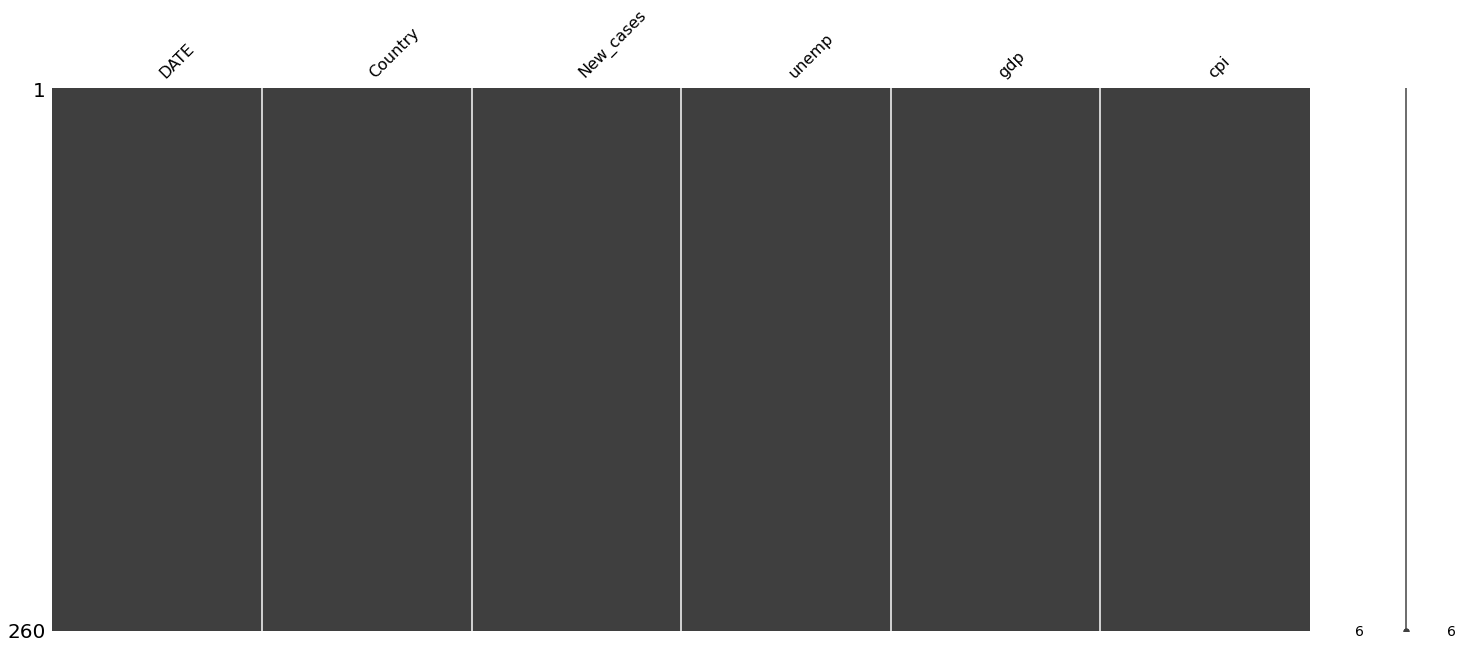

In [12]:
# Create a final dataset for all countries and features

final_df = pd.merge(covid, unemp, how='outer', on=['DATE', 'Country'])
final_df = pd.merge(final_df, gdp, how='outer', on=['DATE', 'Country'])
final_df = pd.merge(final_df, cpi, how='outer', on=['DATE', 'Country'])

final_df.sort_values(by = ['Country', 'DATE'], ascending = True, inplace=True)

# replace null covid cases with 0
final_df["New_cases"].fillna(0, inplace=True)

# filter the dates with a timeframe
final_df = final_df[(final_df.DATE >= "2017-01-01") & (final_df.DATE <= "2021-04-01") ]

# inspect the dataframe visually
missingno.matrix(final_df)

In [83]:
# get the list of countries to iterate
countries = list(set(final_df['Country'].values.tolist()))

In [177]:
final_df = final_df.set_index("DATE")

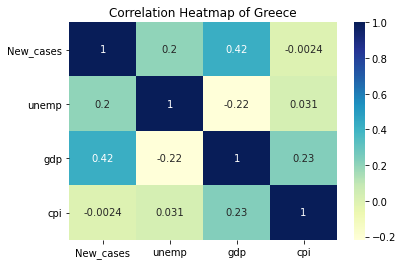

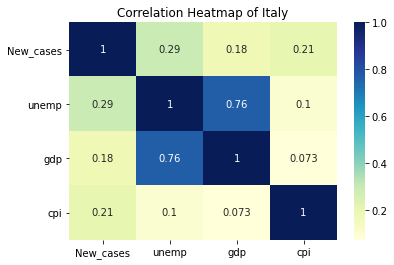

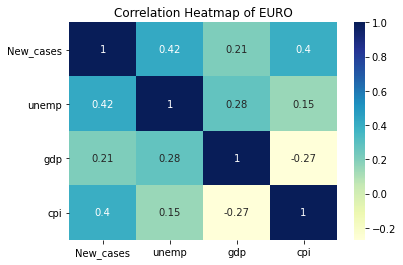

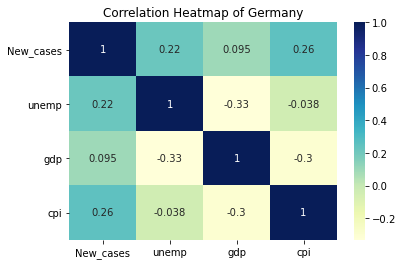

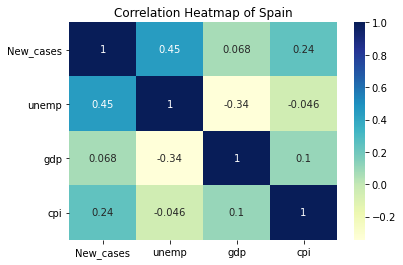

In [178]:
# select continous vars for heatmap and print the correlation matrix using for loop

for country in countries:
    dt_clean_conti_vars = final_df[final_df.Country == country].select_dtypes(include = ['float64', 'int64'])
    dt_clean_conti_vars = dt_clean_conti_vars[dt_clean_conti_vars.New_cases > 0]

    dataplot = sns.heatmap(dt_clean_conti_vars.corr(), cmap="YlGnBu", annot=True)
    plt.title("Correlation Heatmap of " + country)
    plt.show()

### ARIMA-TimeSeries Analysis of Tractor Sales

In this case study example, we will learn about time series analysis. Time series analysis and modeling have many business and social applications. It is extensively used to forecast company sales, product demand, stock market trends, agricultural production etc.

The fundamental idea for time series analysis is to decompose the original time series (sales, stock market trends, etc.) into several independent components. Typically, business time series are divided into the following four components:

- Trend – overall direction of the series i.e. upwards, downwards etc.
- Seasonality – monthly or quarterly patterns
- Cycle – long-term business cycles, they usually come after 5 or 7 years
- Irregular remainder – random noise left after extraction of all the components

Interference of these components produces the final series.

### Problem Definition
We will develop an model to forecast CPI for 2021. 

In [179]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(final_df['cpi'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.70
p-value                         0.07
#lags Used                     12.00
Number of Observations Used   247.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.87
Critical Value (10%)           -2.57
dtype: float64


In [180]:
import sys
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
#import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline


def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [181]:
final_df.columns

Index(['Country', 'New_cases', 'unemp', 'gdp', 'cpi'], dtype='object')

In [182]:
#ARIMA Model with 2 months Lag Marekting Sales Data Regressor
timeseries = final_df["cpi"]
regressors = final_df[['New_cases', 'unemp', 'gdp']]
best_results = auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 2), q=range(0, 2),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2714.931009129516
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1484.8994998600865
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1472.8847944842948
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1485.8661679121733
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1388.31243100975
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1343.0553632604124
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1339.2362220465238
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1344.2042041624486
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1766.7558147549971
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:533.5481931179256
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:500.96563185363715
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:500.6736328873708
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:590.2992262853086
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:532.2133332465586
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:513.2324310951055
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:511.0199026618609
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1095.9569814456252
SARIMAX(1, 0, 0)x(0, 0,

In [183]:
best_model = sm.tsa.statespace.SARIMAX(timeseries,
                                      exog = regressors,
                                      order=(1, 1, 0),
                                      seasonal_order=(1, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [184]:
print(best_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                cpi   No. Observations:                  260
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -249.256
Date:                            Mon, 29 Nov 2021   AIC                            510.513
Time:                                    22:57:57   BIC                            531.545
Sample:                                         0   HQIC                           518.981
                                            - 260                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
New_cases   6.451e-07   3.15e-08     20.461      0.000    5.83e-07    7.07e-07
unemp         -0.3482      0.015   

In [185]:
pred_dynamic = best_results.get_prediction(full_results=True)

pred_dynamic.predicted_mean

DATE
2017-01-01    -5.21
2017-02-01    99.21
2017-03-01   100.69
2017-04-01   101.54
2017-05-01   102.06
              ...  
2020-12-01   104.10
2021-01-01   104.48
2021-02-01   104.05
2021-03-01   103.63
2021-04-01   105.12
Name: predicted_mean, Length: 260, dtype: float64

In [187]:
forecast = pred_dynamic.predicted_mean
actual = final_df['2017-01-01':]['cpi']

In [190]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)
print('The Mean Absolute percentage error of our forecast for last two years is {}'. \
    format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0095


In [191]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 46.1843
The ROOT Mean Squared Error of our forecasts is 6.795903177650488


In [192]:
#Forecast future

In [199]:
Future_cases = final_df[final_df.index > '2021-01-01']
Future_cases = Future_cases[['New_cases', 'unemp', 'gdp']]


In [203]:
#### Step 8: Forecast  using the best fit ARIMA model
#The next step is to predict  for next 6 Months through the above model.

# Get forecast 12 steps (12 Months) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=15, alpha=0.01, exog=Future_cases) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=15, alpha=0.05, exog=Future_cases) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [205]:
n_steps = 15
idx = pd.date_range(final_df.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

fc_99 = pd.DataFrame(np.column_stack([pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2021-04-01,111.15,109.69,112.62,109.69,112.62
2021-05-01,112.82,110.77,114.88,110.77,114.88
2021-06-01,112.69,110.18,115.19,110.18,115.19
2021-07-01,110.12,107.23,113.01,107.23,113.01
2021-08-01,110.26,107.03,113.49,107.03,113.49


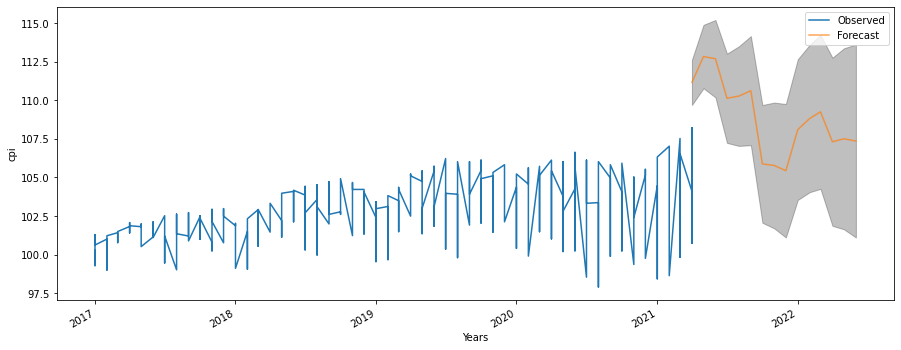

In [206]:
# plot the forecast along with the confidence band
axis = final_df['cpi'].plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('cpi')
plt.legend(loc='best')
plt.show()

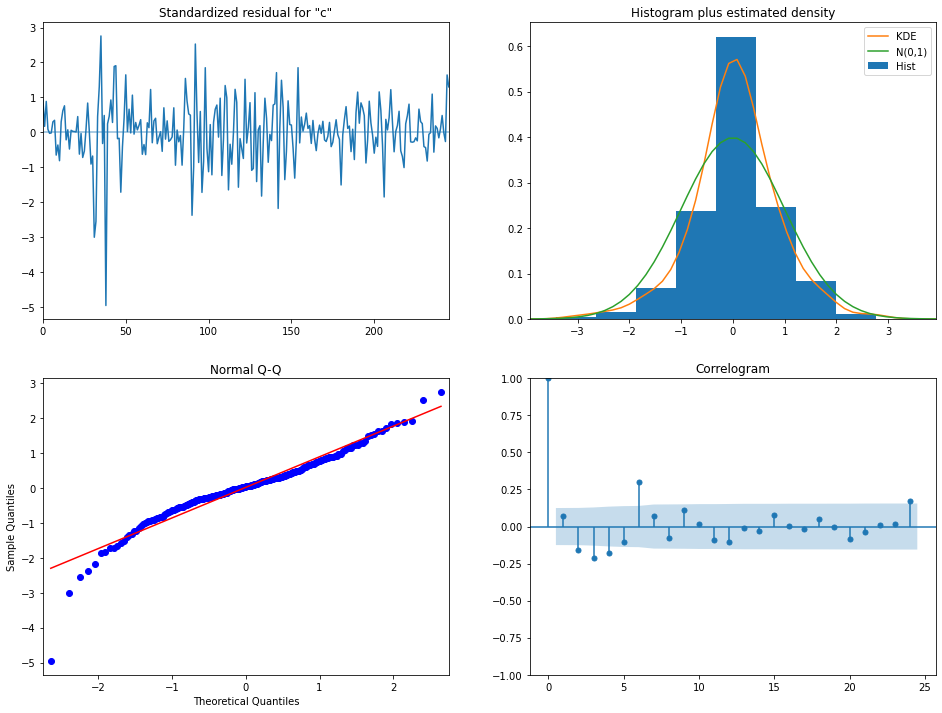

In [207]:
best_results.plot_diagnostics(lags=12, figsize=(16,12))
plt.show()

We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.
In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:
- The KDE plot of the residuals on the top right is almost similar with the normal distribution.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations coupled with the fact that there are no spikes outside the insignificant zone for both ACF and PACF plots lead us to conclude that that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It sems that our ARIMA model is working fine.

## References:
1. Organization for Economic Co-operation and Development, Leading Indicators OECD: Reference series: Gross Domestic Product (GDP): Normalised